In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error

## I. IMPORT DATASET

In [2]:
df = pd.read_csv('imports-85.data')
df.head(5)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


## II. DEFINE THE PROBLEM

_Dựa vào các thông số của các loại xe, xây dựng mô hình thích hợp để dự đoán mức giá xe mới phù hợp_

_Đầu vào là các biến độc lập( tất cả các biến ngoại trừ 'price'). Đầu ra là 'price'_

## III. DATA CLEANSING/ PROPRECESSING & FEATURE ENGINEERING

### 1. Xử lý tổng thể

In [3]:
df_copy = df.copy()

In [4]:
df_copy.head(5)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


* Tạo header cho dataset

In [5]:
first_sample = df_copy.columns
df_first_sample = pd.DataFrame(first_sample).T
df_first_sample.columns = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", 
                    "body-style", "drive-wheels", "engine-location", "wheel-base", "length", 
                    "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size",
                    "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",
                    "peak-rpm", "city-mpg", "highway-mpg", "price"]

df_first_sample

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495


In [6]:
df_copy.columns = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", 
                    "body-style", "drive-wheels", "engine-location", "wheel-base", "length", 
                    "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size",
                    "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",
                    "peak-rpm", "city-mpg", "highway-mpg", "price"]

* Tạo ra dataset mới chứa header

In [7]:
df_full = pd.concat([df_first_sample, df_copy], axis = 0)
df_full.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


* Kiểm tra kiểu dữ liệu

In [8]:
df_types = pd.DataFrame(df_full.dtypes).T.append({'symboling' :'int', 'normalized-losses' : 'float', 'make' : 'string', 
                                             'fuel-type' : 'string',
                                            'aspiration' : 'string', 'num-of-doors' : 'string', 'body-style' : 'string',
                                             'drive-wheels' : 'string',
                                            'engine-location' : 'string', 'wheel-base' : 'float', 'length' : 'float', 
                                             'width' : 'float', 
                                            'height' : 'float', 'curb-weight' : 'float', 'engine-type' : 'string',
                                             'num-of-cylinders' : 'string',
                                            'engine-size' : 'float', 'fuel-system' : 'string', 'bore' : 'float', 
                                             'stroke' : 'float',
                                            'compression-ratio' : 'float', 'hoursepower' : 'float', 'peak-rpm' : 'float',
                                             'city-mpg' : 'float',
                                            'highway-mpg' : 'float', 'price' : 'float'}, ignore_index = True).T
df_types.columns = ['Pandas types', 'Original types']
df_types

,Pandas types,Original types
symboling,object,int
normalized-losses,object,float
make,object,string
fuel-type,object,string
aspiration,object,string
num-of-doors,object,string
body-style,object,string
drive-wheels,object,string
engine-location,object,string
wheel-base,object,float


* Xác định các giá trị khác nhau có trong dataset

In [9]:
for indx in range(0, len(df_full.columns)):
    print(df_full.columns[indx])
    print(df_full.iloc[:, indx].unique())
    print('='*80)

symboling
['3' 3 1 2 0 -1 -2]
normalized-losses
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type
['gas' 'diesel']
aspiration
['std' 'turbo']
num-of-doors
['two' 'four' '?']
body-style
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels
['rwd' 'fwd' '4wd']
engine-location
['front' 'rear']
wheel-base
['88.60' 88.6 94.5 99.8 99.4 105.8 99.5 101.2 103.5 110.0 88.4 93.7 103.3
 95.9 86.6 96.5 94.3 96.0 113.0 102.0 93.1 95.3 98.8 104.9 106.7 115.6
 96.6 120.9 112.0 102.7 93.0 96.3 95.1 97.2 100.4 91.3

* Các feature có các giá trị thuộc dạng 'missing values' tương ứng với kiểu dữ liêụ của nó:

        'normalized-losses' : float/ float64
        'num-of-doors' : string/ object
        'bore' : float/ float64
        'stroke' : float/ float64
        'peark-rpm' : float/ float64
        'price' : float/ float64
    
Các 'missing value' : '?'

### 2. Điền giá trị thiếu

* Thay thế(replace) các 'missing values' sử dụng KNNImputer

In [10]:
df_full = df_full.replace(['?'], np.nan)
df_full.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

* Thống kê số lượng 'missing value' :

        'normalized-losses' : 41
        'num-of-doors' : 2
        'bore' : 4
        'stroke' : 4
        'horsepower' : 2
        'peak-rpm: 2
        'price' : 4

In [11]:
df_full['num-of-doors'] = df_full['num-of-doors'].replace(['four', 'two'], [2, 4])

In [12]:
#Chọn các cột dữ liệu để thay thế
impute_data = df_full[['normalized-losses','num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm']]

In [13]:
#KNN Imputer
from sklearn.impute import KNNImputer

knn_impute = KNNImputer(n_neighbors = 10)  #lấy khoảng 10% tổng sample cho n_neighbors
result = knn_impute.fit_transform(impute_data)

In [14]:
df_full[['normalized-losses','num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm']] = pd.DataFrame(result, 
        columns = ['normalized-losses','num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm'])
df_full.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,133.3,alfa-romero,gas,std,4.0,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495
0,3,133.3,alfa-romero,gas,std,4.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111.0,5000.0,21,27,16500
1,1,133.3,alfa-romero,gas,std,4.0,hatchback,rwd,front,94.5,...,152,mpfi,3.47,2.68,9,111.0,5000.0,19,26,16500
2,2,133.3,audi,gas,std,4.0,sedan,fwd,front,99.8,...,109,mpfi,2.68,3.47,10,154.0,5000.0,24,30,13950
3,2,164.0,audi,gas,std,2.0,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8,102.0,5500.0,18,22,17450


* Thống kê giá trị sau khi thay thế

In [15]:
df_full.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

* Chuyển kiểu dữ liệu cho phù hợp với từng thuộc tính

In [16]:
df_full['normalized-losses'] = df_full['normalized-losses'].astype('float')
df_full['wheel-base '] = df_full['wheel-base'].astype('float')
df_full['length'] = df_full['length'].astype('float')
df_full['width'] = df_full['width'].astype('float')
df_full['curb-weight'] = df_full['curb-weight'].astype('float')
df_full['bore'] = df_full['bore'].astype('float')
df_full['stroke'] = df_full['stroke'].astype('float')
df_full['horsepower'] = df_full['horsepower'].astype('float')
df_full['peak-rpm'] = df_full['peak-rpm'].astype('float')
df_full['price'] = df_full['price'].astype('float')

In [17]:
df_full.dtypes

symboling             object
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors         float64
body-style            object
drive-wheels          object
engine-location       object
wheel-base            object
length               float64
width                float64
height                object
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size           object
fuel-system           object
bore                 float64
stroke               float64
compression-ratio     object
horsepower           float64
peak-rpm             float64
city-mpg              object
highway-mpg           object
price                float64
wheel-base           float64
dtype: object

### 3. Thăm dò dữ liệu

In [18]:
import seaborn as sns

corrMatrix = df_full.corr()
corrMatrix

,normalized-losses,num-of-doors,length,width,curb-weight,bore,stroke,horsepower,peak-rpm,price,wheel-base
normalized-losses,1.000000,0.379354,0.094396,0.081442,0.119750,-0.037771,0.054029,0.213221,0.279261,0.094457,0.031970
num-of-doors,0.379354,1.000000,-0.259809,-0.177608,-0.205002,-0.108718,0.006091,0.128162,0.249899,-0.098421,-0.289757
length,0.094396,-0.259809,1.000000,0.841118,0.877728,0.447707,0.127897,0.350450,-0.274283,0.690628,0.874587
width,0.081442,-0.177608,0.841118,1.000000,0.867032,0.445917,0.204887,0.424006,-0.260348,0.751265,0.795144
curb-weight,0.119750,-0.205002,0.877728,0.867032,1.000000,0.509675,0.139653,0.460476,-0.256809,0.834415,0.776386
bore,-0.037771,-0.108718,0.447707,0.445917,0.509675,1.000000,-0.059025,0.578475,-0.270809,0.459606,0.354440
stroke,0.054029,0.006091,0.127897,0.204887,0.139653,-0.059025,1.000000,0.096230,-0.063017,0.125176,0.137860
horsepower,0.213221,0.128162,0.350450,0.424006,0.460476,0.578475,0.096230,1.000000,0.128124,0.513627,0.213498
peak-rpm,0.279261,0.249899,-0.274283,-0.260348,-0.256809,-0.270809,-0.063017,0.128124,1.000000,-0.166853,-0.329072
price,0.094457,-0.098421,0.690628,0.751265,0.834415,0.459606,0.125176,0.513627,-0.166853,1.000000,0.584642


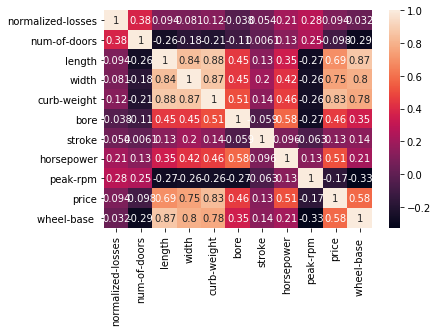

In [19]:
#Heatmap
sns.heatmap(corrMatrix, annot=True)

## III. MODELING & EVALUATION

* import dataset đã qua tiền xử lý

In [20]:
df_eda = pd.read_csv('Model_Dataset.csv')
df_eda = df_eda.drop('Unnamed: 0', axis = 1)
df_eda.head(3)

,curb-weight,engine-size,length,width,horsepower,city-mpg,highway-mpg,wheel-base,bore,drive-wheels,price
0,2548,130,0.811148,0.890278,111.0,21,27,88.6,3.47,rwd,13495.0
1,2548,130,0.811148,0.890278,111.0,21,27,88.6,3.47,rwd,16500.0
2,2823,152,0.822681,0.909722,154.0,19,26,94.5,2.68,rwd,16500.0


In [21]:
df_dummy = df_eda.copy()

In [22]:
df_dummy[['4wd_drive', 'fwd_drive', 'rwd_drive']] = pd.get_dummies(df_dummy[['drive-wheels']])
price = df_dummy.iloc[:,10]
df_dummy = df_dummy.drop(['price', 'drive-wheels'], axis = 1)
df_dummy = pd.concat([df_dummy, pd.DataFrame(price)], axis = 1)
df_dummy.head(3)

,curb-weight,engine-size,length,width,horsepower,city-mpg,highway-mpg,wheel-base,bore,4wd_drive,fwd_drive,rwd_drive,price
0,2548,130,0.811148,0.890278,111.0,21,27,88.6,3.47,0,0,1,13495.0
1,2548,130,0.811148,0.890278,111.0,21,27,88.6,3.47,0,0,1,16500.0
2,2823,152,0.822681,0.909722,154.0,19,26,94.5,2.68,0,0,1,16500.0


### 1. Simple Linear Regression

In [23]:
def linear_model(X_value, y_value):
    """X_value, y_value, predict_value : DataFrame"""
    X_train, X_test, y_train, y_test = train_test_split(X_value, y_value, test_size = 0.2, random_state = 0)
    SC = StandardScaler()
    X_SC = SC.fit_transform((X_train))
    X_SC_test = SC.transform((X_test))
    model = LinearRegression()   
        
    model.fit(X_SC, y_train)
    yhat = model.predict(X_SC_test)
    
    R2_train = model.score(X_SC, y_train)
    R2_test = model.score(X_SC_test, y_test)
    RMSE = mean_squared_error(y_test, yhat, squared=False)
    
    scores_4 = cross_val_score(model, X_value, y_value, cv=4)
    scores_5 = cross_val_score(model, X_value, y_value, cv=5) 

    return RMSE, R2_train, R2_test, scores_4, scores_5, model

        return MSE, R2_train, R2_test, score_4, score_5, model

In [24]:
simple_input1 = df_dummy[['horsepower']]
simple_input2 = df_dummy[['curb-weight']]
target = df_dummy[['price']]

In [25]:
line1_rmse, line1_r2_train, line1_r2_test, line1_score_4, line1_score_5, line1_model = linear_model(simple_input1, target)
line2_rmse, line2_r2_train, line2_r2_test, line2_score_4, line2_score_5, line2_model = linear_model(simple_input2, target)

### 2. Multi-Linear Regression

In [26]:
multi_reg_input = df_dummy[['horsepower', 'curb-weight', 'engine-size']]
all_input = df_dummy.drop('price', axis = 1)

In [27]:
line3_rmse, line3_r2_train, line3_r2_test, line3_score_4, line3_score_5, line3_model = linear_model(multi_reg_input, target)
line4_rmse, line4_r2_train, line4_r2_test, line4_score_4, line4_score_5, line4_model = linear_model(all_input, target)

### 3. Polynomial Regresison

In [28]:
def poly_reg(X, y, deg):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    SC = StandardScaler()
    poly = PolynomialFeatures(degree = deg, include_bias = False)
    mol = LinearRegression()

    X_train_normalize = SC.fit_transform(X_train)
    X_test_normalize = SC.transform(X_test)
    
    X_train_poly = poly.fit_transform(X_train_normalize)
    X_test_poly = poly.transform(X_test_normalize)
    
    model = mol.fit(X_train_poly, y_train)
    
    y_test_pred = model.predict(X_test_poly)
    
    R2_train = model.score(X_train_poly, y_train)
    R2_test = model.score(X_test_poly, y_test)
    RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
    
    scores_4 = cross_val_score(model, X, y, cv=4)
    scores_5 = cross_val_score(model, X, y, cv=5) 

    return RMSE, R2_train, R2_test, scores_4, scores_5, model

In [29]:
line5_rmse, line5_r2_train, line5_r2_test, line5_score_4, line5_score_5, line5_model = poly_reg(all_input, target, 3)
line6_rmse, line6_r2_train, line6_r2_test, line6_score_4, line6_score_5, line6_model = poly_reg(all_input, target, 5)

### 4. Support Vector Regression

In [30]:
def svm_reg(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    SC = StandardScaler()
    X_train_nor = SC.fit_transform(X_train)
    X_test_nor = SC.transform(X_test)
    
    model = SVR(kernel = 'linear', C=1, epsilon=0.001)
    model.fit(X_train_nor, y_train)
    
    y_test_pred = model.predict(X_test_nor)
    
    R2_train = model.score(X_train_nor, y_train)
    R2_test = model.score(X_test_nor, y_test)
    RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
    
    scores_4 = cross_val_score(model, X, y, cv=4)
    scores_5 = cross_val_score(model, X, y, cv=5)
    
    return RMSE, R2_train, R2_test, scores_4, scores_5, model

In [31]:
line7_rmse, line7_r2_train, line7_r2_test, line7_score_4, line7_score_5, line7_model = svm_reg(all_input, target)

C:\Users\aquar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aquar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aquar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aquar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

### 5. K-NN Regression

In [32]:
def knn_reg(X, y, num_of_neighbor):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    SC = StandardScaler()
    X_train_nor = SC.fit_transform(X_train)
    X_test_nor = SC.transform(X_test)
    
    model = KNeighborsRegressor(n_neighbors=num_of_neighbor)
    model.fit(X_train_nor, y_train)

    y_test_pred = model.predict(X_test_nor)
    
    R2_train = model.score(X_train_nor, y_train)
    R2_test = model.score(X_test_nor, y_test)
    RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
    
    scores_4 = cross_val_score(model, X, y, cv=4)
    scores_5 = cross_val_score(model, X, y, cv=5)
    
    return RMSE, R2_train, R2_test, scores_4, scores_5, model

In [33]:
line8_rmse, line8_r2_train, line8_r2_test, line8_score_4, line8_score_5, line8_model = knn_reg(all_input, target, 2)
line9_rmse, line9_r2_train, line9_r2_test, line9_score_4, line9_score_5, line9_model = knn_reg(all_input, target, 5)

### 6. Decision Tree Regression

In [34]:
def decision_tree_reg(X, y, max_depth_tree):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    SC = StandardScaler()
    X_train_nor = SC.fit_transform(X_train)
    X_test_nor = SC.transform(X_test)
    
    model = DecisionTreeRegressor(max_depth=max_depth_tree)
    model.fit(X_train_nor, y_train)
    
    y_test_pred = model.predict(X_test_nor)
    
    R2_train = model.score(X_train_nor, y_train)
    R2_test = model.score(X_test_nor, y_test)
    RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
    
    scores_4 = cross_val_score(model, X, y, cv=4)
    scores_5 = cross_val_score(model, X, y, cv=5)
    
    return RMSE, R2_train, R2_test, scores_4, scores_5, model

In [35]:
line10_rmse, line10_r2_train, line10_r2_test, line10_score_4, line10_score_5, line10_model = decision_tree_reg(all_input, target, 2)
line11_rmse, line11_r2_train, line11_r2_test, line11_score_4, line11_score_5, line11_model = decision_tree_reg(all_input, target, 5)

### 7. Random Forest Regression

* RandomizedSearchCV

mse = mean_squared_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
mae =  mean_absolute_error(y_test, y_test_pred)
mse, rmse, mae

rd_search.best_params_

In [36]:
def randomforest_reg(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    SC = StandardScaler()
    X_train_nor = SC.fit_transform(X_train)
    X_test_nor = SC.transform(X_test)
    
    n_estimators = [5, 10, 12, 14, 15, 20, 25, 30, 40, 50, 70]
    max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]
    min_samples_split = [2, 5, 10]
    min_samples_leaf = [1, 2, 4]
    bootstrap = [True, False]
    random_grid = {'n_estimators': n_estimators,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}
    
    randomforest = RandomForestRegressor()
    rd_search = RandomizedSearchCV(estimator = randomforest_model,
                                   param_distributions = random_grid, n_iter = 100, cv = 3,
                                   verbose=2, random_state=42, n_jobs = -1)
    model = rd_search.fit(X_train_nor, y_train)
    
    y_test_pred = model.predict(X_test_nor)
    
    
    R2_train = model.score(X_train_nor, y_train)
    R2_test = model.score(X_test_nor, y_test)
    RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
    
    scores_4 = cross_val_score(model, X, y, cv=4)
    scores_5 = cross_val_score(model, X, y, cv=5)
    
    return RMSE, R2_train, R2_test, scores_4, scores_5, model

In [37]:
line12_rmse, line12_r2_train, line12_r2_test, line12_score_4, line12_score_5, line12_model = randomforest_reg(all_input, target)

NameError: name 'randomforest_model' is not defined

## RESULT REPORTING

In [ ]:
array_model = ['Simple Linear Regresison', 
              'Simple Linear Regresison', 
              'Multiple Linear Regresison',
              'Multiple Linear Regresison', 
              'Polynomial Linear Regression', 
              'Polynomial Linear Regression',
             'Support Vector Machine', 
              'K-NN Regression', 
              'K-NN Regression', 
              'Decision Tree Regressison', 
              'Decision Tree Regressison',
              'Random Forest Regression']

In [ ]:
array_feature_details = ['horsepower', 'curb-weight', 'all feature(except target)',
                         'all feature(except target)', 'all feature(except target)',
                         'all feature(except target)', 'all feature(except target)',
                         'all feature(except target)', 'all feature(except target)',
                         'all feature(except target)', 'all feature(except target)',
                         'all feature(except target)']

In [ ]:
array_RMSE = [line1_rmse, line2_rmse, line3_rmse, line4_rmse, line5_rmse, line6_rmse,
              line7_rmse, line8_rmse, line9_rmse, line10_rmse, line11_rmse, line2_rmse]

In [ ]:
array_R2_train = [line1_r2_train, line2_r2_train, line3_r2_train, line4_r2_train, line5_r2_train, line6_r2_train,
                  line7_r2_train, line8_r2_train, line9_r2_train, line10_r2_train, line11_r2_train, line12_r2_train]

In [ ]:
array_R2_test = [line1_r2_test, line2_r2_test, line3_r2_test, line4_r2_test, line5_r2_test, line6_r2_test,
                  line7_r2_test, line8_r2_test, line9_r2_test, line10_r2_test, line11_r2_test, line12_r2_test]

In [ ]:
array_4_fold = []
array_5_fold = []
scores4 = [line1_score_4, line2_score_4, line3_score_4, line4_score_4, line5_score_4, line1_score_4,
                line7_score_4, line8_score_4, line9_score_4, line10_score_4, line11_score_4, line12_score_4]

scores5 = [line1_score_5, line2_score_5, line3_score_5, line4_score_5, line5_score_5, line1_score_5,
                line7_score_5, line8_score_5, line9_score_5, line10_score_5, line11_score_5, line12_score_5]
for val4, val5 in zip(scores4, scores5):
    array_4_fold.append([np.min(val4), np.mean(val4), np.max(val4)])
    array_5_fold.append([np.min(val5), np.mean(val5), np.max(val5)])

In [ ]:
table_report = pd.DataFrame(np.array([array_model, array_feature_details, array_RMSE,
                       array_R2_train, array_R2_test, array_4_fold, array_5_fold])).T

In [ ]:
table_report

In [ ]:
table_report.columns = ['Model', 'Feature Details', 'RMSE', 'R2 Train', 'R2 Test', '4-Fold', '5-Fold']

#### 4-Fold/ 5-Fold : [min score, mean score, max score]

In [ ]:
table_report